##Entrega 1- Inteligência Artificial e Aprendizado de Máquina

In [36]:
from google.colab import files
files.upload()

Saving Dados de pedidos - Cannoli.json to Dados de pedidos - Cannoli.json


{'Dados de pedidos - Cannoli.json': b'[\n  {\n    "id": "IFOOD_c2b5ba58-f819-469c-99c9-09ea2fae2835",\n    "displayId": "4146",\n    "category": "FOOD",\n    "orderTiming": "IMMEDIATE",\n    "orderType": "DELIVERY",\n    "delivery": {\n      "mode": "DEFAULT",\n      "description": "Padr\xc3\xa3o",\n      "deliveredBy": "MERCHANT",\n      "deliveryDateTime": "2025-08-27T17:26:17.823Z",\n      "deliveryAddress": {\n        "streetName": "Exemplo",\n        "streetNumber": "Exemplo",\n        "formattedAddress": "Exemplo",\n        "neighborhood": "Exemplo",\n        "complement": "Exemplo",\n        "postalCode": "00000-000",\n        "city": "S\xc3\xa3o Paulo",\n        "state": "SP",\n        "country": "BR",\n        "coordinates": {\n          "latitude": -23.470608,\n          "longitude": -46.588434\n        }\n      },\n      "pickupCode": "5560"\n    },\n    "preparationStartDateTime": "2025-08-27T16:56:17.823Z",\n    "isTest": false,\n    "salesChannel": "IFOOD",\n    "merchant

# Dados trabalhados

In [112]:
import pandas as pd
import numpy as np
import json

df2 = pd.read_json("Dados de pedidos - Cannoli.json")

df2.to_csv("Dados de pedidos - Cannoli.csv", index=False)
df2.head()

,id,displayId,category,orderTiming,orderType,delivery,preparationStartDateTime,isTest,salesChannel,merchant,...,cancellation,integrated,integrationId,scheduledAt,scheduled,takeout,takeOutTimeInSeconds,version,extraInfo,indoor
0,IFOOD_c2b5ba58-f819-469c-99c9-09ea2fae2835,4146,FOOD,IMMEDIATE,DELIVERY,"{'mode': 'DEFAULT', 'description': 'Padrão', '...",2025-08-27T16:56:17.823Z,False,IFOOD,"{'id': '40afd127-533e-41ee-adde-2e20c9da5712',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IFOOD_b21d3375-8877-4cef-8673-dabf4ceb1852,0899,FOOD,IMMEDIATE,DELIVERY,"{'mode': 'DEFAULT', 'description': 'Padrão', '...",2025-08-27T14:30:23.892Z,False,IFOOD,"{'id': '40afd127-533e-41ee-adde-2e20c9da5712',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IFOOD_77073c46-1ee6-4711-b78c-24aa03dbdbdb,4796,FOOD,IMMEDIATE,DELIVERY,"{'mode': 'DEFAULT', 'description': 'Padrão', '...",2025-08-27T06:08:46.162Z,False,IFOOD,"{'id': '40afd127-533e-41ee-adde-2e20c9da5712',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IFOOD_3473890d-e460-4f2e-b9a9-2a2c146639a8,2383,FOOD,IMMEDIATE,DELIVERY,"{'mode': 'DEFAULT', 'description': 'Padrão', '...",2025-08-27T05:51:25.432Z,False,IFOOD,"{'id': '40afd127-533e-41ee-adde-2e20c9da5712',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DELIVERYVIP_30537017-7064-42b4-83e7-b399399dfbce,LCRRVW,NaN,IMMEDIATE,DELIVERY,"{'deliveryAddress': {'country': 'BR', 'state':...",2025-08-27T05:54:58.779Z,False,CANNOLI,"{'id': '1745956859395BA7BB07E98BF5D6132C', 'na...",...,NaN,0.0,NaN,None,0.0,NaN,1800.0,0.0.3,NaN,NaN


###Limpeza e a soma de dados nulos

In [45]:
df2.describe()
df2.isnull().sum()

,0
id,0
displayId,0
category,5
orderTiming,0
orderType,0
delivery,0
preparationStartDateTime,0
isTest,0
salesChannel,0
merchant,0


###Visualização dos preços

In [71]:
import json
import pandas as pd

# Ler JSON
with open("Dados de pedidos - Cannoli.json", "r", encoding="utf-8") as f:
    dados = json.load(f)

# Lista para armazenar preços e nomes
precos = []


for pedido in dados:
    if "items" in pedido:
        for item in pedido["items"]:
            if "unitPrice" in item and "name" in item:
                precos.append({"name": item["name"], "unitPrice": item["unitPrice"]})

# Criar DataFrame
df_precos = pd.DataFrame(precos)

print(df_precos.shape)


                          name  unitPrice
0  Esfiha de Palmito c/ Queijo       6.79
1    Esfiha de Milho c/ Queijo       6.59
2        Refrigerantes - 350ml       9.10
3             Esfiha de Queijo       5.70
4          Esfiha de Chocolate       8.90
(28, 2)


In [42]:

df2.dropna()

,id,displayId,category,orderTiming,orderType,delivery,preparationStartDateTime,isTest,salesChannel,merchant,...,cancellation,integrated,integrationId,scheduledAt,scheduled,takeout,takeOutTimeInSeconds,version,extraInfo,indoor


#dados

In [72]:
df = pd.read_csv("Order_semicolon.csv", sep=';')
df.dropna()
df.head(200)

,id,companyId,containerId,createdAt,customer,displayId,engineId,engineName,engineType,extraInfo,...,orderTiming,orderType,salesChannel,scheduledAt,status,preparationTime,takeOutTimeInSeconds,totalAmount,updatedAt,version
0,1,I0VP1DZXGU,AKVXT2FH,08/01/2025 15:47,525,O8CC98,E3R037,DirectOrder,POS,Adipisci maiores nam eius vero nesciunt sed.,...,IMMEDIATE,DELIVERY,ANOTAAI,NaN,DISPATCHED,45,2131,90.91,09/01/2025 03:32,v3.7.8
1,2,04MEUULZ6W,KKMY5TG5,03/11/2024 22:30,694,HJ99VA,EJVOBV,DirectOrder,APP,NaN,...,IMMEDIATE,DELIVERY,WHATSAPP,NaN,CONCLUDED,33,374,99.69,04/11/2024 03:05,v2.3.0
2,3,W2ZZS7CCZW,I87JLGTV,09/09/2024 05:49,491,XJJDH2,UDX1ZF,KDSPro,POS,NaN,...,IMMEDIATE,INDOOR,EPADOCA,NaN,CONCLUDED,22,247,45.97,09/09/2024 09:32,v1.9.5
3,4,SQ5MBL8L24,W3ZXOQHO,22/05/2025 06:22,846,J8QDM3,30FLOC,KDSPro,WEB,Autem mollitia voluptas quasi.,...,SCHEDULED,TAKEOUT,99FOOD,22/05/2025 14:22,CANCELED,35,1766,104.31,22/05/2025 21:39,v2.8.5
4,5,0RCNJ6BRJD,NA0C0FOS,22/02/2025 01:23,77,H4LV73,QI3URN,KDSPro,POS,NaN,...,SCHEDULED,DELIVERY,99FOOD,24/02/2025 11:23,DISPATCHED,20,1219,105.50,22/02/2025 13:53,v2.1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,9E8QONIH00,4Y63WQ07,31/08/2025 21:16,49,CL8WP4,497U0P,DirectOrder,APP,Pariatur perspiciatis sapiente labore exercita...,...,SCHEDULED,DELIVERY,IFOOD,01/09/2025 21:16,CANCELED,19,3040,79.68,01/09/2025 07:25,v1.7.3
196,197,BYJB3G7LMN,P3ZDH4MQ,18/09/2024 08:27,77,WE12IU,GVF2GJ,CannoliEngine,APP,Distinctio aliquid quisquam corrupti.,...,SCHEDULED,TAKEOUT,SITE,18/09/2024 14:27,CANCELED,60,1521,16.64,18/09/2024 12:31,v2.7.6
197,198,TDP1FXKYJJ,Z858O0J3,01/01/2025 21:25,323,T8UFHZ,YW2K2Y,KDSPro,WEB,NaN,...,SCHEDULED,TAKEOUT,99FOOD,03/01/2025 19:25,CANCELED,55,3247,55.02,02/01/2025 03:11,v3.4.4
198,199,ENF0DEZRH2,DITP2XE1,08/01/2025 09:05,994,HVLN7W,FMUEHG,CannoliEngine,APP,Nisi odit dolore accusantium aut.,...,SCHEDULED,INDOOR,WHATSAPP,09/01/2025 19:05,CANCELED,32,306,11.94,08/01/2025 15:17,v3.7.8


In [ ]:
!pip install -U pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3db79ea85bf834546bb0b08b4f8c98a8460a8cf11dbd3a7ca01f16e435756808
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: 

In [ ]:
!pip install -U ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Foun

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
perfil=ProfileReport(df, title = "Análise Exploratória de Dados", html = {"style":{"full_with": False}})

In [31]:
colunas_especificas = ['status', 'totalAmount', 'createdAt']
perfil=ProfileReport(df[colunas_especificas], title = "Análise Exploratória de Dados", html = {"style":{"full_with": False}})

In [32]:
perfil.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00,  5.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Quantidade de pedidos por status:


#

In [149]:
# Contagem de pedidos por status
pedidos_status = df_faturamento.groupby("status").size()
print("Quantidade de pedidos por status:")
print(pedidos_status)

# Total de faturamento por status
faturamento_status = df_faturamento.groupby("status")["faturamento"].sum()
print("\nFaturamento total por status:")
print(faturamento_status)


Quantidade de pedidos por status:
status
CANCELLED                                 2
CONCLUDED                                13
DELIVERY_DROP_CODE_VALIDATION_SUCCESS     1
dtype: int64

Faturamento total por status:
status
CANCELLED                                 81.34
CONCLUDED                                181.42
DELIVERY_DROP_CODE_VALIDATION_SUCCESS     26.44
Name: faturamento, dtype: float64


##Treinamento de máquina para pprevisibilidade de Faturamento

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Transformar status em número
le = LabelEncoder()
df_faturamento["status_num"] = le.fit_transform(df_faturamento["status"])

# Número de itens por pedido
df_faturamento["num_itens"] = [len(pedido.get("items", [])) for pedido in dados]


X = df_faturamento[["status_num", "num_itens"]]
y = df_faturamento["faturamento"]

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)

# Mostrar previsão
print("\nFaturamento real:", list(y_test))
print("Faturamento previsto:", list(y_pred))



Faturamento real: [28.18, 26.44, 0.0, 0.0]
Faturamento previsto: [np.float64(35.69855421686748), np.float64(9.503614457831318), np.float64(10.230361445783132), np.float64(1.7409638554216826)]


## Gráfico identifica a previsão de faturamento por preços



*   UnitPrice
*   status

É possivel verificar que o faturamento é ate um resultado bom devido ao coeficiente R2=1.000.



In [185]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import PredictionError

# Ler JSON
with open("Dados de pedidos - Cannoli.json", "r", encoding="utf-8") as f:
    dados = json.load(f)

# Preparar DataFrame de faturamento por pedido
rows = []
for pedido in dados:
    order_id = str(pedido.get("id")).strip()
    status = pedido.get("status")
    items = pedido.get("items", [])
    total_price = sum([item.get("unitPrice", 0) for item in items])
    rows.append({
        "id": order_id,
        "status": status,
        "faturamento": total_price,
        "num_itens": len(items)
    })

df_faturamento = pd.DataFrame(rows)

# Transformar status em números
le = LabelEncoder()
df_faturamento["status_num"] = le.fit_transform(df_faturamento["status"])

# Features e target
X = df_faturamento[["status_num", "num_itens"]]
y = df_faturamento["faturamento"]

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


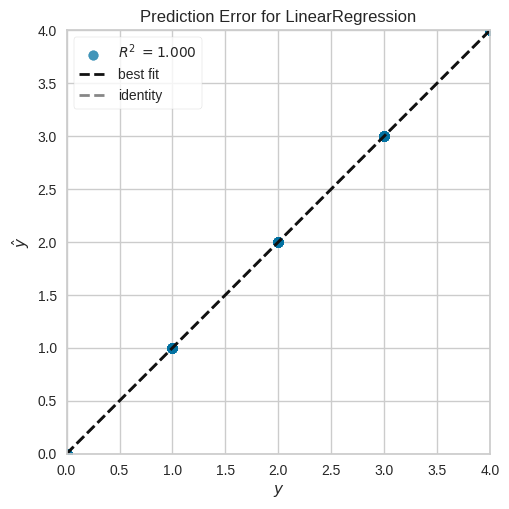

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [150]:
# Criar modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

# Visualizar erro de previsão com Yellowbrick
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [108]:
!pip install --quiet yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 6.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


#Gráfico que deveria mostra a quantidade meses por pedidos

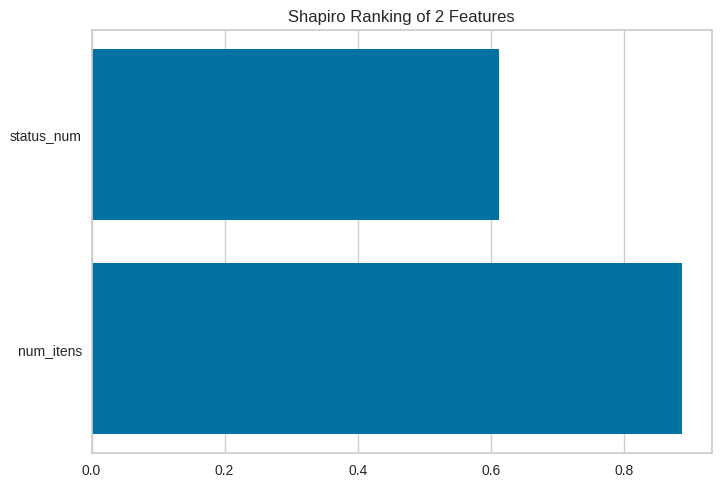

<Axes: title={'center': 'Shapiro Ranking of 2 Features'}>

In [191]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Order_semicolon.csv", sep=";")

# Converter datas
df['createdAt'] = pd.to_datetime(df['createdAt'], dayfirst=True, errors='coerce')
#X, y = load_credit()

visualizador = Rank1D(algorithm='shapiro')

visualizador.fit(X,y)
visualizador.transform(X)
visualizador.show()

## Grafico mostra valores de faturamento

###A análise de correlação evidencia que apenas a variável número de itens por pedido (num_itens) apresenta uma relação moderada a forte com o faturamento, confirmando que pedidos maiores tendem a gerar maior receita. Em contrapartida, a variável status do pedido (status_num) demonstra correlação quase nula tanto com o número de itens quanto com o faturamento, indicando baixo poder preditivo.

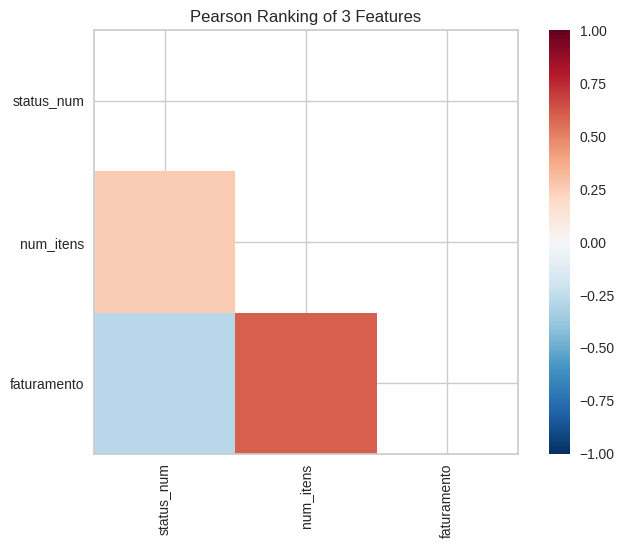

<Axes: title={'center': 'Pearson Ranking of 3 Features'}>

In [183]:
import pandas as pd
from yellowbrick.features import Rank2D

# Carregar CSV
df = pd.read_csv("Order_semicolon.csv", sep=";")

# Converter datas
df['createdAt'] = pd.to_datetime(df['createdAt'], dayfirst=True, errors='coerce')


#X2, y2 = load_credit()


#visualizdor2.fit(X2,y2)
visualizdor = Rank2D(algorithm="pearson")
visualizdor.fit_transform(X)
visualizdor.show()

##gráfico é uma visualização de dispersão que mostra como os diferentes status de pedidos estão distribuídos ao longo do tempo



*  Não há períodos específicos com um número significativamente maior ou menor de pedidos em um determinado status. Isso sugere que a operação é consistente e não tem grandes picos ou quedas sazonais para nenhum dos status.




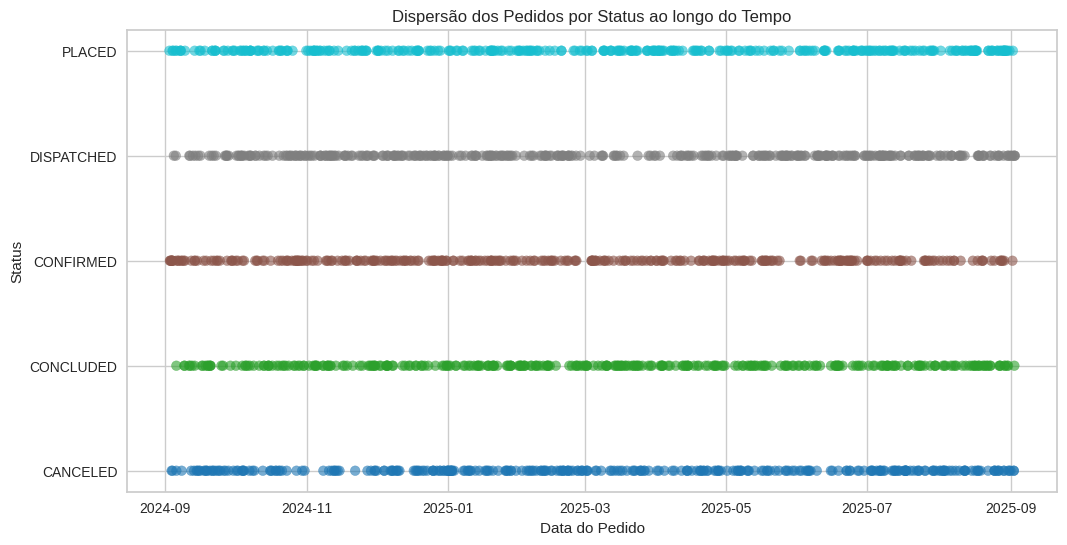

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Carregar CSV
df = pd.read_csv("Order_semicolon.csv", sep=";")

# Converter datas
df['createdAt'] = pd.to_datetime(df['createdAt'], dayfirst=True, errors='coerce')

# Remover nulos
df = df.dropna(subset=['createdAt', 'status'])

# Selecionar apenas status desejados
status_desejados = ['DISPATCHED','PLACED','CONFIRMED','CONCLUDED','CANCELED']
df = df[df['status'].isin(status_desejados)]

# Converter status para números (para usar no gráfico)
le = LabelEncoder()
df['status_num'] = le.fit_transform(df['status'])

# Gráfico de dispersão
plt.figure(figsize=(12,6))
plt.scatter(df['createdAt'], df['status_num'], alpha=0.6, c=df['status_num'], cmap="tab10")

# Ajustes visuais
plt.title("Dispersão dos Pedidos por Status ao longo do Tempo")
plt.xlabel("Data do Pedido")
plt.ylabel("Status")
plt.yticks(df['status_num'].unique(), le.inverse_transform(df['status_num'].unique()))
#plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


#Problema identificado:
###
Cannoli Apresenta dificuldade em demonstrar para seus clientes diretos o impacto positivo dos seus negócios. Sendo assim, é possível analisar a quantidade de pedidos realizados e cancelados pelos os clientes, e através dos dados  captados é possível identificar o faturamento das empresas. Portanto, com o auxílio da Inteligência Artificial e aprendizado de máquina é plausível realizar a previsibilidade de faturamento dos pedidos usando o status e os valores e data.